# Exploratory Data Analysis on Real Estate Data

# Task

__The data__
- The dataset can be found in the file "King_County_House_prices_dataset.csv", in this folder.
- The description of the column names can be found in the column_names.md file in this repository.
- The column names are NOT clear at times.
In the real world we will run into similar challenges. We would then go ask our business stakeholders for more information. In this case, let us assume our business stakeholder who would give us information, left the company. Meaning we would have to identify and look up what each column names might actually mean.


__Tasks for you__
1. Through statistical analysis/EDA, above please come up with AT LEAST 3 (you can definitely get bonus points for more than 3) recommendations for home sellers and/or buyers in King County.
2. Then model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.
3. Acceptable R squared values = 0.7 to 0.9
4. Optional: 

    a. Split the dataset into a train and a test set. 
    
    b. Use Root Mean Squared Error (RMSE) as your metric of success and try to minimize this score on your test data.


__The Deliverables__
1. A well documented Jupyter Notebook containing any code you've written for this project and comments explaining it. This work will need to be pushed to your GitHub repository in order to submit your project (latest upload: 17.09.2020 11:00).
2. An organized README.md file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
3. A short Keynote/PowerPoint/Google Slides presentation giving a high-level overview of your methodology and recommendations for non-technical stakeholders. The duration of the presentation should be 10 minutes, then the discussion will continue for 5 minutes. Also put your slides (delivered as a PDF export) on Github to get a well-rounded project.


![DataScienceLifecycle](/images/DataScienceLifecycle.png)


# 01 Business Understanding
_Ask relevant questions and define objectives for the problem that needs to be tackled._

__Basic Input__


- King County (source, wikipedia: https://en.wikipedia.org/wiki/King_County,_Washington):
    - population was 2,252,782 in the 2019 (Wikipedia)
    - Of the 789,232 households, 29.2% had children under the age of 18 living with them, 45.3% were married couples living together, 9.1% had a female householder with no husband present, 41.5% were non-families, and 31.0% of all households were made up of individuals. The average household size was 2.40 and the average family size was 3.05. The median age was 37.1 years.
    - The median income for a household in the county was $68,065 and the median income for a family was $87,010. Males had a median income of $62,373 versus $45,761 for females. The per capita income for the county was $38,211. About 6.4% of families and 10.2% of the population were below the poverty line, including 12.5% of those under age 18 and 8.6% of those age 65 or over.[34]

__Initial Thoughts__
- Potential questions to answer:
    - Where can I get best value for money in terms of e.g. livingsquare, a waterfront good condition, etc.
    - Which features have the strongest impact on the price?
    - Over time, what were the calculated tco for the purchase of a house, combining loan interests and purchase price?
    - Based on the zipcode: Are there differences regarding the increase / decrease of prices
    - What’s the best time to buy a house
    - Think like “if you want to have features x, y, z, than look for...”
    - Check for outliers


__Potential additional sources__
- Purchase price / rent price ratio
- poverty rate
- crime rate
- no / locations of schools, kindergardens, parks, sights, big employers

<font color=dark red>Think about using that command later:</font>

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## 02 Data Mining
_Gather and scrape the data necessary for the project._


### Importing the data 

In [9]:
# reset namespace:

In [10]:
reset -fs

In [167]:
# load standard library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from pandas.plotting import scatter_matrix

%matplotlib inline
# load additional packages

In [128]:
# loading the initial dataframe
X = pd.read_csv("data/King_County_House_prices_dataset.csv")

### Getting a first overview of the data

#### Column Names and descriptions for Kings County Data Set

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [226]:
X.sort_values("date").head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold,weekday_sold
7316,2202500290,2014-05-02,435000.0,4,1.0,1450,8800,1.0,0.0,0.0,...,1954,0.0,98006,47.5746,-122.135,1260,8942,2014,5,4
20586,7853361370,2014-05-02,555000.0,4,2.5,3310,6500,2.0,0.0,0.0,...,2012,0.0,98065,47.5150,-121.870,2380,5000,2014,5,4
1040,7197300105,2014-05-02,550000.0,4,2.5,1940,10500,1.0,NaN,0.0,...,1976,0.0,98052,47.6830,-122.114,2200,10500,2014,5,4
20543,3438501320,2014-05-02,295000.0,2,2.5,1630,1368,2.0,0.0,0.0,...,2009,0.0,98106,47.5489,-122.363,1590,2306,2014,5,4
9587,472000620,2014-05-02,790000.0,3,2.5,2600,4750,1.0,0.0,0.0,...,1951,0.0,98117,47.6833,-122.400,2380,4750,2014,5,4


In [227]:
X.sort_values("date").tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold,weekday_sold
19381,8149600265,2015-05-14,725000.0,4,1.75,1980,5850,1.0,NaN,1.0,...,1960,0.0,98116,47.5607,-122.391,1810,5850,2015,5,3
12623,4166600610,2015-05-14,335000.0,3,2.00,1410,44866,1.0,0.0,0.0,...,1985,0.0,98023,47.3273,-122.370,2950,29152,2015,5,3
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0.0,0.0,...,1960,0.0,98007,47.5951,-122.144,1870,7650,2015,5,4
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0.0,0.0,...,1941,0.0,98115,47.6914,-122.308,920,6380,2015,5,6
16580,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0.0,0.0,...,1924,0.0,98115,47.6747,-122.303,2170,4590,2015,5,2


In [99]:
X.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18803,9348500220,7/28/2014,555000.0,3,3.00,2410,12183,2.0,0.0,0.0,...,9,2410,0.0,1988,NaN,98011,47.7470,-122.177,2540,9979
5609,7785000010,12/4/2014,750000.0,5,2.25,2020,8400,1.0,0.0,0.0,...,7,1010,1010.0,1963,0.0,98040,47.5763,-122.219,1890,9233
17592,7954300740,9/9/2014,527000.0,4,2.50,2830,6163,2.0,0.0,0.0,...,9,2830,0.0,2000,0.0,98056,47.5227,-122.190,2730,6202
17284,8079010190,6/26/2014,440000.0,4,2.50,2250,7526,2.0,0.0,0.0,...,8,2250,0.0,1989,NaN,98059,47.5123,-122.150,1980,7526
530,1545807610,4/29/2015,270500.0,3,2.50,1780,7848,1.0,0.0,0.0,...,7,1320,460.0,1978,0.0,98038,47.3608,-122.056,1680,7848
7892,7660100336,12/10/2014,300000.0,3,2.50,1020,1570,2.0,0.0,0.0,...,7,720,300.0,2004,NaN,98144,47.5871,-122.317,1470,1249
8223,5366200205,6/3/2014,613000.0,3,2.50,1350,3068,2.0,0.0,0.0,...,7,1350,0.0,1991,0.0,98122,47.6099,-122.293,1900,4000
19974,7234601140,11/13/2014,685000.0,3,2.25,1710,1193,2.0,0.0,0.0,...,9,1140,570.0,2014,0.0,98122,47.6173,-122.310,1510,1193
10020,1646501920,10/30/2014,579500.0,3,1.75,1250,4120,1.0,0.0,0.0,...,7,980,270.0,1925,0.0,98117,47.6850,-122.360,1250,4120
9087,4174600331,7/17/2014,384000.0,6,3.00,2320,4502,1.0,NaN,0.0,...,7,1200,1120.0,1987,NaN,98108,47.5552,-122.300,1160,5628


In [235]:
X.describe().round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold,weekday_sold
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,...,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,...,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0,2014.0,7.0,2.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,...,29.0,400.0,54.0,0.0,0.0,685.0,27274.0,0.0,3.0,1.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,...,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0,2014.0,1.0,0.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,...,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0,2014.0,4.0,1.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,...,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0,2014.0,6.0,2.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,...,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0,2015.0,9.0,3.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,...,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0,2015.0,12.0,6.0


In [100]:
# gain general overview over data structure
X.info()

# shows missings at waterfront, view, yr_renovated missing
# two "object" - not possible to compute these columns without transformation or cleaning (date, sqft_basemend)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## 03 Data Cleaning
_Fix the inconsistencies within the data and handle the missing values._


### Missing values:

               Count  Percentage
waterfront      2376        11.0
view              63         0.3
sqft_basement    454         2.1
yr_renovated    3842        17.8


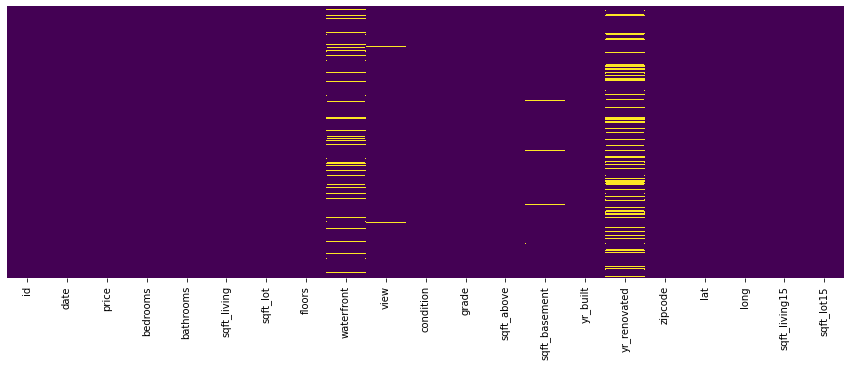

In [120]:
# check for na_values
nan = pd.DataFrame(X.isnull().sum(),columns=['Count'])
nan['Percentage'] = round(nan.Count/X.shape[0]*100,1)
print(nan[nan.Count!=0])

# show heatmap of all null values in the dataset
fig, ax = plt.subplots(figsize=(15,5)) 
ax = sns.heatmap(X.isnull(), yticklabels=False, cbar=False, cmap="viridis");


4 out of 24 colums have missing values:
 - **waterfront** has 2.376 (11%) missing values
 - **view** 63 entries do not provide a view value (0.3%)
 - **yr_renovated** is lacking 3842 (17.8 values) 
 - **sqft_basement**: After dropping the non numerical values, 2.1% entries (count = 454) are missing ta value

In [131]:
# yr_renovated includes a lot of 0 values that are skewing the analysis, check later

### Checking and cleaning data types

**Date** and **sqft_basement** are type object and should be transformed / cleand for further processing.

In [186]:
# transform date object to dtype pd.datetime
X.date = pd.to_datetime(X.date)

# for easier comparison create additional "yr_sold" column and use instead of date
X["yr_sold"], X["month_sold"], X["weekday_sold"] = X.date.dt.year, X.date.dt.month, X.date.dt.dayofweek

# convert string values to numeric if possible, drop values otherwise
X.sqft_basement = pd.to_numeric(X.sqft_basement, errors="coerce")

# convert float type to bool.
X.astype({"waterfront": "bool"})
X.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
yr_sold                   int64
month_sold                int64
weekday_sold              int64
dtype: object

### Find duplicate ids

In [233]:
X.duplicated().count()

21597

In [173]:
dups = X[X.id.duplicated(keep=False)].sort_values(by=["id","date"])
dups

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold
2494,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316,2014,9
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316,2015,4
16800,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969,2014,10
16801,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969,2015,4
11421,109200390,2014-08-20,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956,2014,8
11422,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956,2014,10
12405,123039336,2014-06-11,148000.0,1,1.00,620,8261,1.0,0.0,0.0,...,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244,2014,6
12406,123039336,2014-12-08,244900.0,1,1.00,620,8261,1.0,0.0,0.0,...,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244,2014,12
7785,251300110,2014-07-31,225000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017,2014,7
7786,251300110,2015-01-14,358000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017,2015,1


###  Calculate prices per feet

In [242]:
X["price_per_sqft_living"] = round(X.price/X.sqft_living, 2)
X["price_per_sqft_lot"] = round(X.price/X.sqft_lot, 2)
X.describe()[["price_per_sqft_living","price_per_sqft_lot"]]

,price_per_sqft_living,price_per_sqft_lot
count,21597.000000,21597.000000
mean,264.143331,88.988986
std,110.000058,94.059627
min,87.590000,0.160000
25%,182.290000,33.330000
50%,244.640000,59.260000
75%,318.330000,107.610000
max,810.140000,2019.700000


## 04 Data Exploration
_Form hypotheses about your defined problem by visually analyzing the data._


### Checking for likely categorical values

In [243]:
# check for categorical values
cats = pd.DataFrame(X.nunique(), columns=["UniqueValues"])
cats.T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold,weekday_sold,price_per_sqft_living,price_per_sqft_lot
UniqueValues,21420,372,3622,12,29,1034,9776,6,2,5,...,70,5033,751,777,8682,2,12,7,14017,12170


Based on general knowledge it is highly likely that the following variables are categorical:
- zipcode

Furthermore, we drop the following values for a correlation analysis, as the result would be probably missleading:
- lat
- long


In [245]:
continuous_var = list(X.select_dtypes(
                        ['int64','float64','bool', "datetime64[ns]"]).columns.values)
# remove non-continuous variables
non_continuous_var = ["id", "zipcode", "lat", "long"]
for x in non_continuous_var:
    continuous_var.remove(x)

continuous_var


['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15',
 'yr_sold',
 'month_sold',
 'weekday_sold',
 'price_per_sqft_living',
 'price_per_sqft_lot']

### Perform Correlation Analysis 

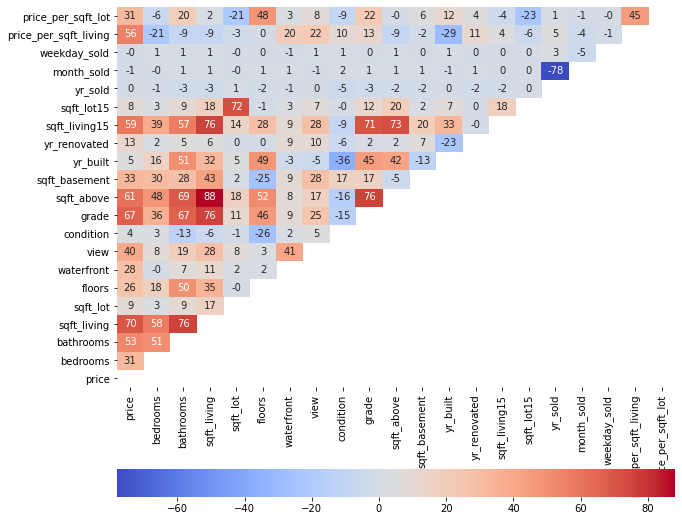

In [247]:
X_dum=pd.get_dummies(X[continuous_var].copy())
X_dum
mask = np.triu(X_dum.corr())
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm'
                 ,cbar_kws= {'orientation': 'horizontal'}
                )
ax.set_ylim((0,21))
plt.savefig('figures/correlogram.png')

Focussing on price, the strongest correlation is found with sqft living, followed by grade, sqft_above and sqft living 15 and the view.

'# Note: date is not shown on correlogram

Pairplot: Two many figures, doesn't make any sense.

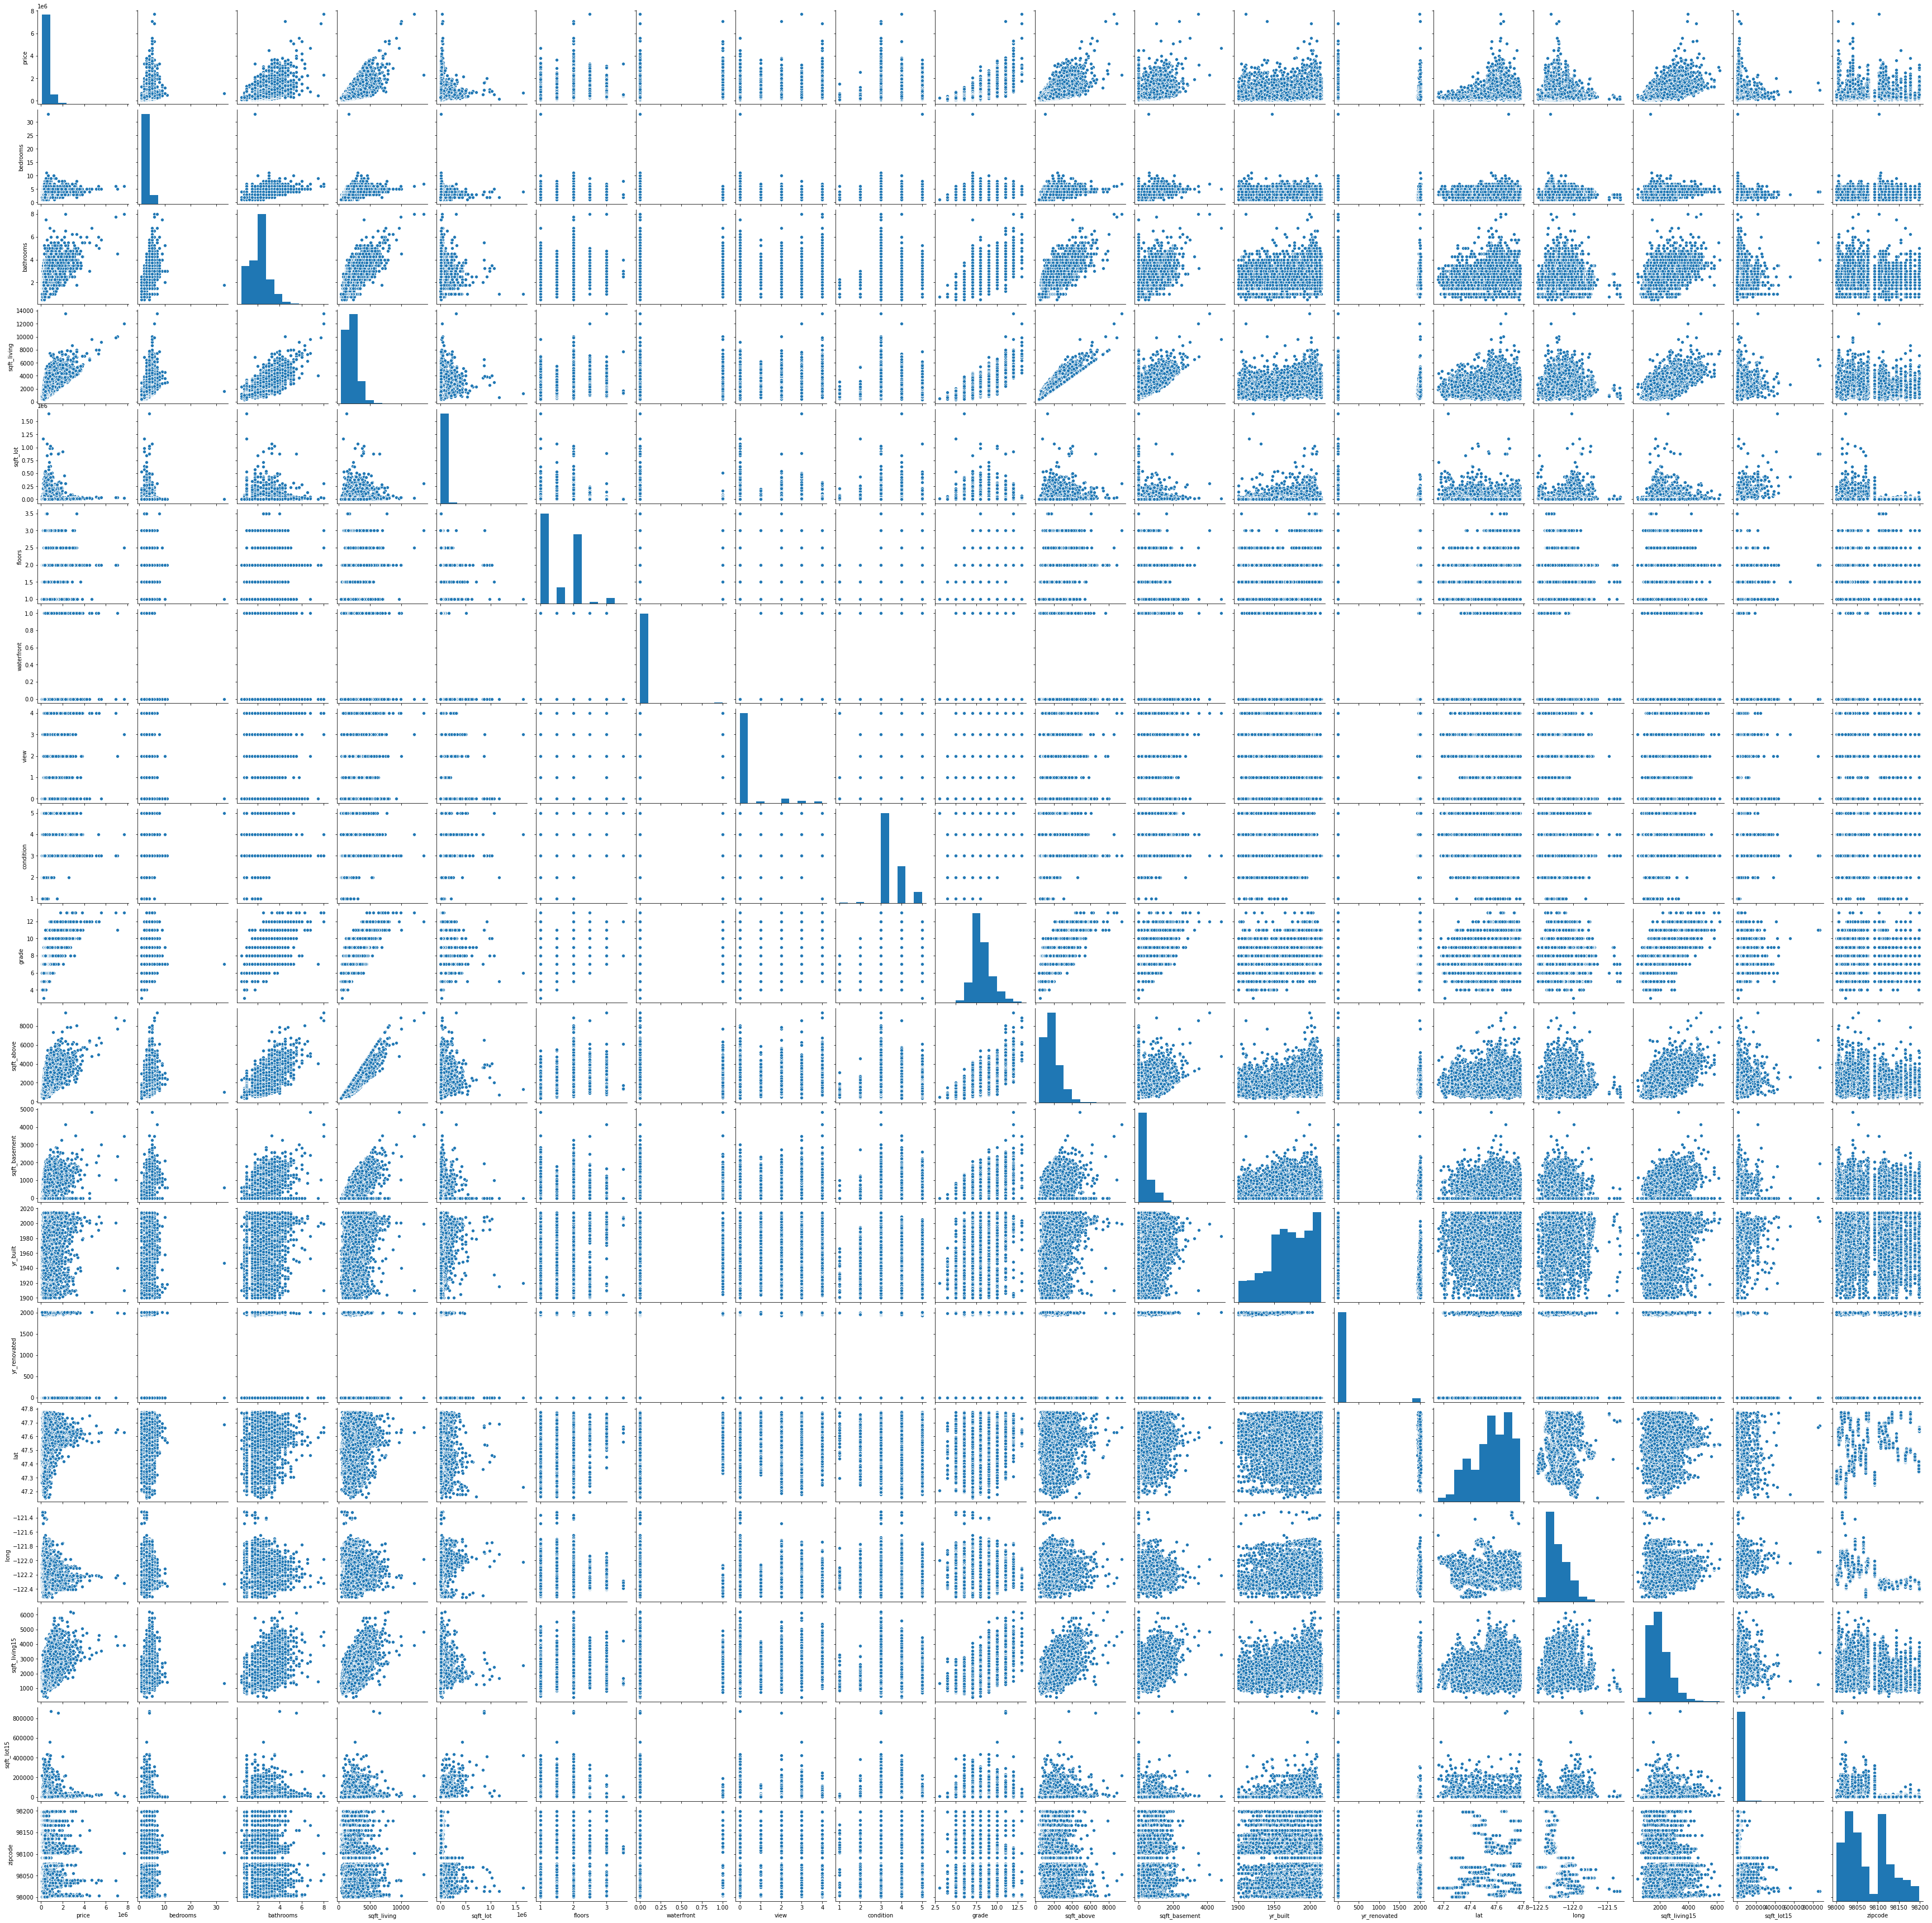

In [75]:
_ =sns.pairplot(X_dum)
plt.savefig('figures/pairplot.png')

/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/david/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/david/opt/anaconda3/envs/nf/lib

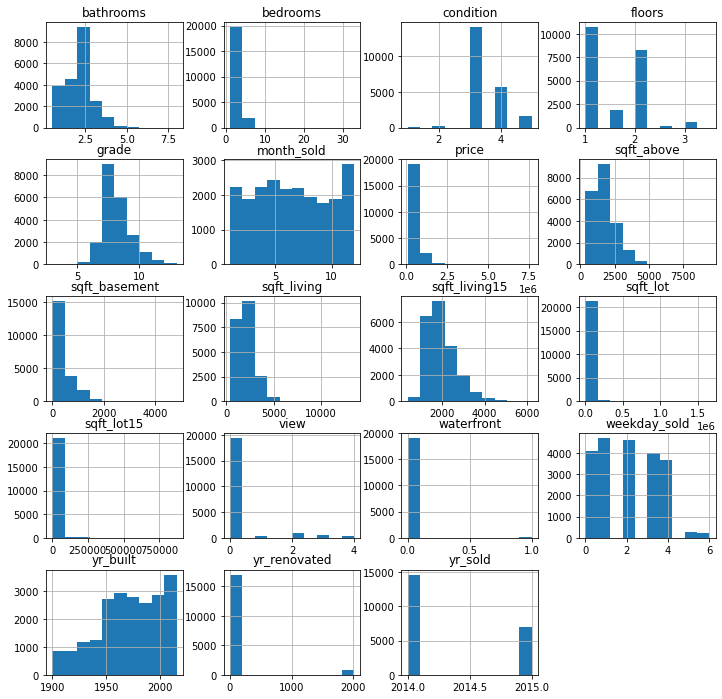

In [222]:
_ = X_dum.hist(figsize=(12,12))
plt.savefig('figures/hist_all.png');

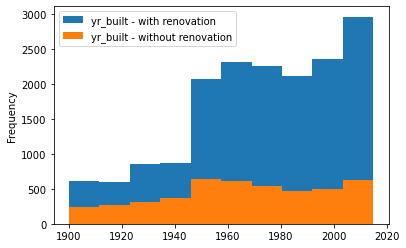

In [155]:
wo_renovation = X.query("yr_renovated == 0").yr_built
with_renovation = X.query("yr_renovated != 0").yr_built
wo_renovation.plot(kind="hist")
with_renovation.plot(kind="hist")
plt.legend(["yr_built - with renovation", "yr_built - without renovation"])



### Basic statistics 

In [34]:
X.describe().round(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540296.6,3.4,2.1,2080.3,15099.4,1.5,0.0,0.2,3.4,7.7,1788.6,1971.0,83.6,98078.0,47.6,-122.2,1986.6,12758.3
std,2.876736e+09,367368.1,0.9,0.8,918.1,41412.6,0.5,0.1,0.8,0.7,1.2,827.8,29.4,399.9,53.5,0.1,0.1,685.2,27274.4
min,1.000102e+06,78000.0,1.0,0.5,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,2.123049e+09,322000.0,3.0,1.8,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.2,1910.0,7618.0,1.5,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.5,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


### Setting up and transforming the initial values

In [46]:
continuous_var = list(X.select_dtypes(
                        ['int64','float64','bool']).columns.values)
# remove non-continuous variables
non_continuous_var = ["id", "zipcode", "lat", "long"]
for x in non_continuous_var:
    continuous_var.remove(x)

categorical_var = [""]
continuous_var

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15']

### Time series analysis: Developing of purchases

In [230]:
print(f"Time series starts(date sold): {X.date.min()}")
print(f"Time series ends(date sold): {X.date.max()}")

# We have date for a period of about 1 year

Time series starts(date sold): 2014-05-02 00:00:00
Time series ends(date sold): 2015-05-27 00:00:00


Timestamp('2015-05-27 00:00:00')

In [207]:
# Average house prices per year:
X.groupby("yr_sold").agg({'id':'count', 'price':'mean'}) \
       .rename(columns={'id':'count','price':'mean'}) \
       .reset_index()



,yr_sold,count,mean
0,2014,14622,539350.911777
1,2015,6975,542279.005878


There is a slight increase of prices in 2015 compared to 2014. 

In [220]:
# Average house prices per month:
X.groupby("month_sold").agg({'id':'count', 'price':'mean'}) \
       .rename(columns={'id':'count','price':'mean'}) \
       .reset_index()


,month_sold,count,mean
0,1,978,525963.251534
1,2,1247,508520.051323
2,3,1875,544057.683200
3,4,2229,562215.615074
4,5,2414,550849.746893
5,6,2178,557534.318182
6,7,2211,544892.161013
7,8,1939,536655.212481
8,9,1771,529723.517787
9,10,1876,539439.447228


It appears as the prices are significantly higher for purches in summer, than they are during winter!

In [224]:
# Average house prices per month:
X.groupby("weekday_sold").agg({'id':'count', 'price':'mean'}) \
       .rename(columns={'id':'count','price':'mean'}) \
       .reset_index()

,weekday_sold,count,mean
0,0,4097,543997.141811
1,1,4710,541261.502123
2,2,4600,538771.465652
3,3,3989,531695.872148
4,4,3684,544427.500000
5,5,287,565065.721254
6,6,230,537212.108696


## 05 Feature Engineering
_Select important features and construct more meaningful ones using the raw date._

<font color="blue">Thoughts:</font>

- If you want to purchase a house for reselling, which house should you buy?
    
    - cluster zipcodes into different regions, analyse figures based on those regions.
    - explore seasonal price development   
    - where can you get "best value for money"



## 06 Predictive Modeling
_Train machine learning models, evaluate their performance, and use them to make predictions._


<font color="blue">Perform linear regression</font>

## 07 Data Visualization
_Communicate the findings with key stakeholders using plots and interactive visualizations._
